In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

/tmp/ipykernel_959156/773666571.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = data.groupby("Model")["Performance"].mean().reset_index()


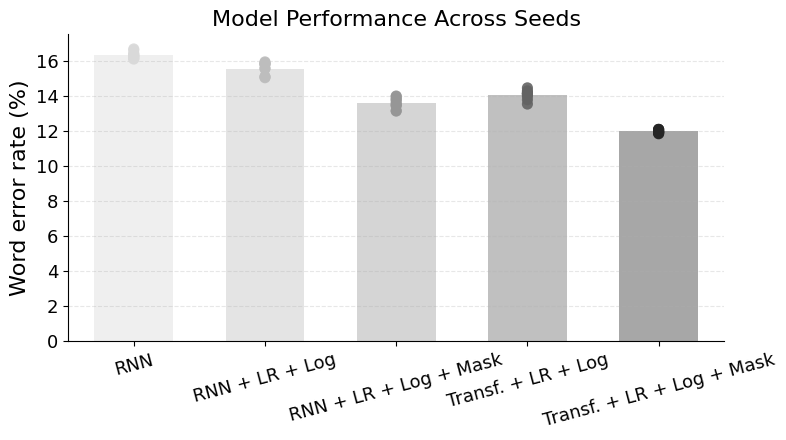

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Made-up performance values
model_perf_dict = {
    "RNN": np.random.uniform(15.7, 16.7, size=10),
    "RNN + LR + Log": np.random.uniform(15, 16, size=10),
    "RNN + LR + Log + Mask": np.random.uniform(13, 14, size=10),
    "Transf. + LR + Log": np.random.uniform(13.5, 14.5, size=10),
    "Transf. + LR + Log + Mask": np.random.uniform(11.8, 12.2, size=10),
}

# Desired model order
model_order = [
    "RNN",
    "RNN + LR + Log",
    "RNN + LR + Log + Mask",
    "Transf. + LR + Log",
    "Transf. + LR + Log + Mask"
]

# Convert to DataFrame
data = pd.DataFrame([
    {"Model": model, "Performance": perf}
    for model, perfs in model_perf_dict.items()
    for perf in perfs
])
data["Model"] = pd.Categorical(data["Model"], categories=model_order, ordered=True)

# Grayscale palette from light to dark
grayscale = ["#d9d9d9", "#bdbdbd", "#969696", "#636363", "#252525"]
palette = dict(zip(model_order, grayscale))

# Compute means
means = data.groupby("Model")["Performance"].mean().reset_index()

# Plot setup
plt.figure(figsize=(8, 4.5))

# Transparent mean bars
for _, row in means.iterrows():
    plt.bar(
        row["Model"], row["Performance"], 
        color=palette[row["Model"]], 
        alpha=0.4, 
        zorder=0, 
        width=0.6
    )

# Strip plot
sns.stripplot(
    data=data,
    x="Model",
    y="Performance",
    hue="Model",
    palette=palette,
    order=model_order,
    jitter=False,
    size=8,
    alpha=0.9,
    legend=False,
    zorder=2
)

plt.title("Model Performance Across Seeds", fontsize=16)
plt.ylabel("Word error rate (%)", fontsize=16)
plt.xlabel("")
plt.xticks(fontsize=13, rotation=15)
plt.yticks(fontsize=13)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipykernel_959156/3227388103.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = data.groupby("Model")["Performance"].mean().reset_index()
/tmp/ipykernel_959156/3227388103.py:58: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


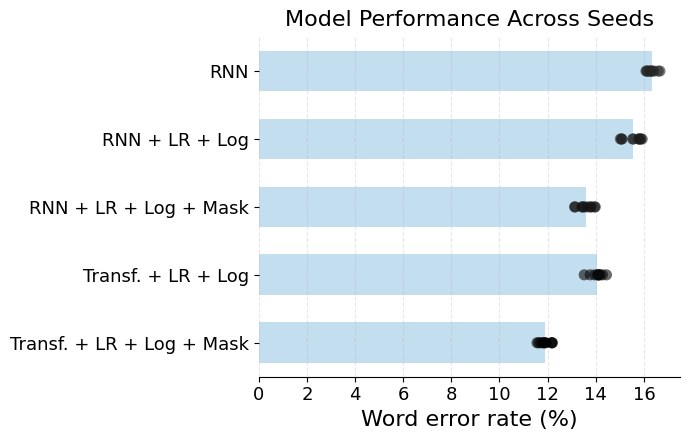

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# -------------------------------------------------
# 1.  Data (same as before)
# -------------------------------------------------
np.random.seed(0)

model_perf_dict = {
    "RNN": np.random.uniform(15.7, 16.7, size=10),
    "RNN + LR + Log": np.random.uniform(15, 16, size=10),
    "RNN + LR + Log + Mask": np.random.uniform(13, 14, size=10),
    "Transf. + LR + Log": np.random.uniform(13.5, 14.5, size=10),
    "Transf. + LR + Log + Mask": np.random.uniform(11.5, 12.5, size=10),
}

model_order = [
    "RNN",
    "RNN + LR + Log",
    "RNN + LR + Log + Mask",
    "Transf. + LR + Log",
    "Transf. + LR + Log + Mask",
]

# long‑form DataFrame
data = pd.DataFrame(
    [{"Model": m, "Performance": p} for m, ps in model_perf_dict.items() for p in ps]
)
data["Model"] = pd.Categorical(data["Model"], categories=model_order, ordered=True)

# grayscale palette (light → dark)
#bluescale = ["#c6dbef", "#9ecae1", "#6baed6", "#3182bd", "#08519c"]
#palette = dict(zip(model_order, bluescale))
bar_color = "#6baed6"  # a clean mid-blue

# mean WER per model
means = data.groupby("Model")["Performance"].mean().reset_index()

# -------------------------------------------------
# 2.  Plot
# -------------------------------------------------
plt.figure(figsize=(7, 4.5))

# transparent horizontal bars showing means
for _, row in means.iterrows():
    plt.barh(
        y=row["Model"],
        width=row["Performance"],
        color=bar_color,
        alpha=0.4,
        height=0.6,
        zorder=0,
    )

# seed‑level scatter (horizontal strip plot)
sns.stripplot(
    data=data,
    y="Model",
    x="Performance",
    order=model_order,
    hue="Model",
    color='black',
    jitter=False,
    size=8,
    alpha=0.6,
    legend=False,
    zorder=2,
)

# -------------------------------------------------
# 3.  Cosmetics
# -------------------------------------------------
plt.title("Model Performance Across Seeds", fontsize=16, pad=8)
plt.xlabel("Word error rate (%)", fontsize=16)
plt.ylabel("")                         # category labels already on the y‑axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(left=0)                       # origin at 0 for clarity
plt.grid(axis="x", linestyle="--", alpha=0.3)
sns.despine(left=True)
plt.tight_layout()
plt.show()


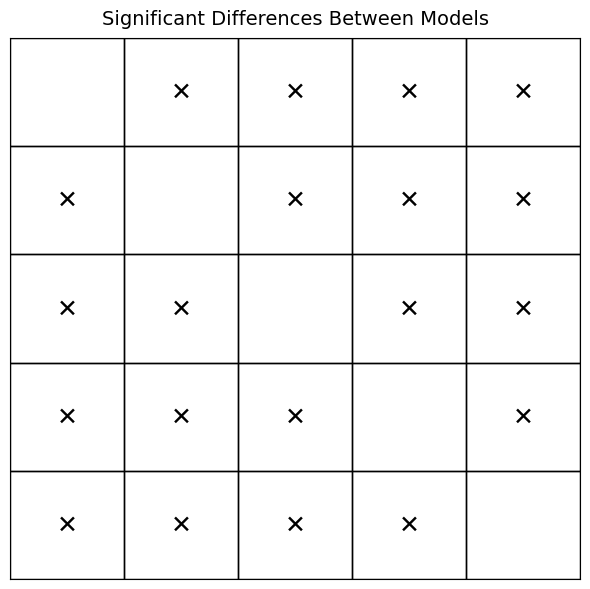

In [63]:
from scipy.stats import ttest_ind
model_names = list(model_perf_dict.keys())
n_models = len(model_names)

significance_matrix = np.full((n_models, n_models), '', dtype=object)

for i, model_i in enumerate(model_names):
    for j, model_j in enumerate(model_names):
        if i == j:
            continue  # skip self-comparisons
        stat, p = ttest_ind(model_perf_dict[model_i], model_perf_dict[model_j])
        if p < 0.05:
            significance_matrix[i, j] = '✕'

# -------------------------------------------------
# 3. Plot Grid
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-0.5, n_models - 0.5)
ax.set_ylim(-0.5, n_models - 0.5)
ax.invert_yaxis()

# Draw grid
for x in range(n_models):
    for y in range(n_models):
        ax.add_patch(plt.Rectangle((x - 0.5, y - 0.5), 1, 1,
                                   fill=False, edgecolor='black'))
        # Add ✕ if significant
        if significance_matrix[y, x] == '✕':
            ax.text(x, y, '✕', fontsize=18, ha='center', va='center')

# Remove all ticks, tick‑labels, and axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title("Significant Differences Between Models", fontsize=14, pad=10)

plt.tight_layout()
plt.show()

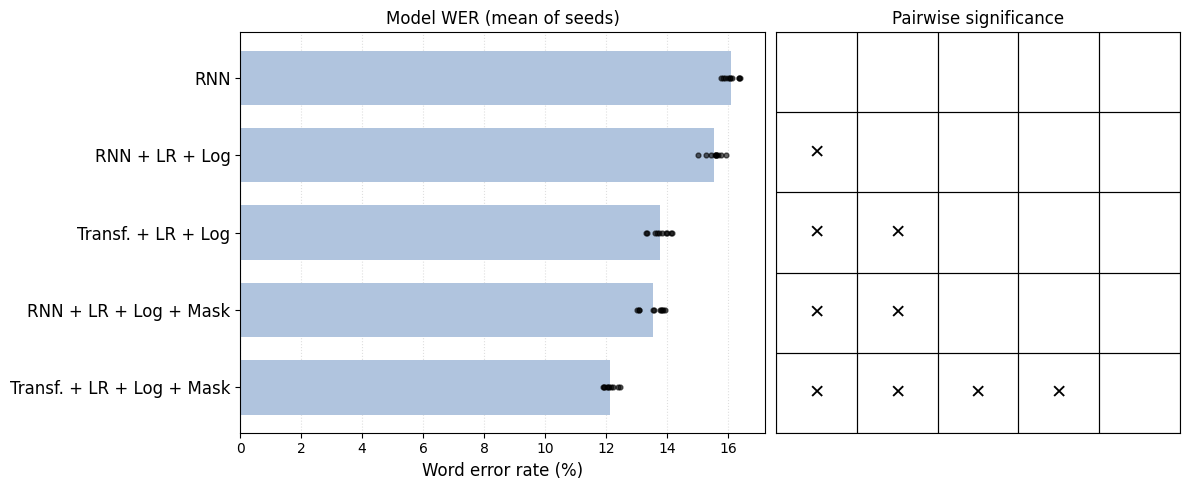

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# -------------------------------------------------
# 1.  Fake data & significance matrix
# -------------------------------------------------
np.random.seed(0)
model_perf_dict = {
    "Transf. + LR + Log + Mask": np.random.uniform(11.5, 12.5, 10),
    "RNN + LR + Log + Mask":     np.random.uniform(13.0, 14.0, 10),
    "Transf. + LR + Log":        np.random.uniform(13.2, 14.2, 10),
    "RNN + LR + Log":            np.random.uniform(15.0, 16.0, 10),
    "RNN":                       np.random.uniform(15.7, 16.7, 10),
}
model_names = list(model_perf_dict.keys())[::-1]  # reverse for top-down plot
n_models = len(model_names)

sig = np.full((n_models, n_models), '', dtype=object)
for i in range(n_models):
    for j in range(n_models):
        if i == j:
            continue
        _, p = ttest_ind(model_perf_dict[model_names[i]],
                         model_perf_dict[model_names[j]], alternative='less')
        if p < 0.05:
            sig[i, j] = '✕'

# -------------------------------------------------
# 2. Shared‑axis figure
# -------------------------------------------------
fig, (ax_bar, ax_grid) = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 5),
    gridspec_kw={'width_ratios': [1.3, 1]}, 
)

y_pos = np.arange(n_models)

# ---- bar plot (left) ----
means = [np.mean(model_perf_dict[m]) for m in model_names]
ax_bar.barh(y_pos, means, color='lightsteelblue', height=0.7)

for y, m in zip(y_pos, model_names):
    ax_bar.scatter(model_perf_dict[m], np.full_like(model_perf_dict[m], y),
                   s=12, color='black', alpha=.6)

ax_bar.set_title('Model WER (mean of seeds)')
ax_bar.set_xlabel('Word error rate (%)', fontsize=12)
ax_bar.set_yticks(y_pos)
ax_bar.set_yticklabels(model_names, fontsize=12)
ax_bar.tick_params(axis='y', labelleft=True)  # <<--- THIS LINE FIXES IT
ax_bar.invert_yaxis()
ax_bar.grid(True, axis='x', linestyle=':', alpha=.4)
ax_bar.set_axisbelow(True)

# ---- significance grid (right) ----
ax_grid.set_xlim(-0.5, n_models - 0.5)
ax_grid.set_ylim(-0.5, n_models - 0.5)
ax_grid.invert_yaxis()

for x in range(n_models):
    for y in range(n_models):
        ax_grid.add_patch(
            plt.Rectangle((x - 0.5, y - 0.5), 1, 1,
                          fill=False, edgecolor='black', lw=.8)
        )
        if sig[y, x] == '✕':
            ax_grid.text(x, y, '✕', ha='center', va='center', fontsize=14)

ax_grid.set_xticks([])
ax_grid.set_yticks([])
ax_grid.set_title('Pairwise significance')

plt.tight_layout(w_pad=0.8)
plt.show()
